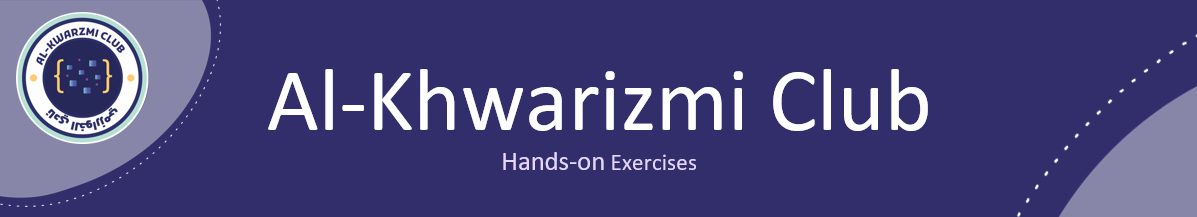

 Open in Google Colab:

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1fMDKIiEmxoYltUIrp0PIDSeIGYakwmCY/view?usp=sharing)

Key Components of ANN:

- Input Layer: Takes in the input features of the data.
- Hidden Layer(s): Intermediate layers where computations are performed. Each neuron applies weights and biases to the inputs, passing the result through an activation function.
- Output Layer: Produces the final prediction or classification based on the data processed through the hidden layers.

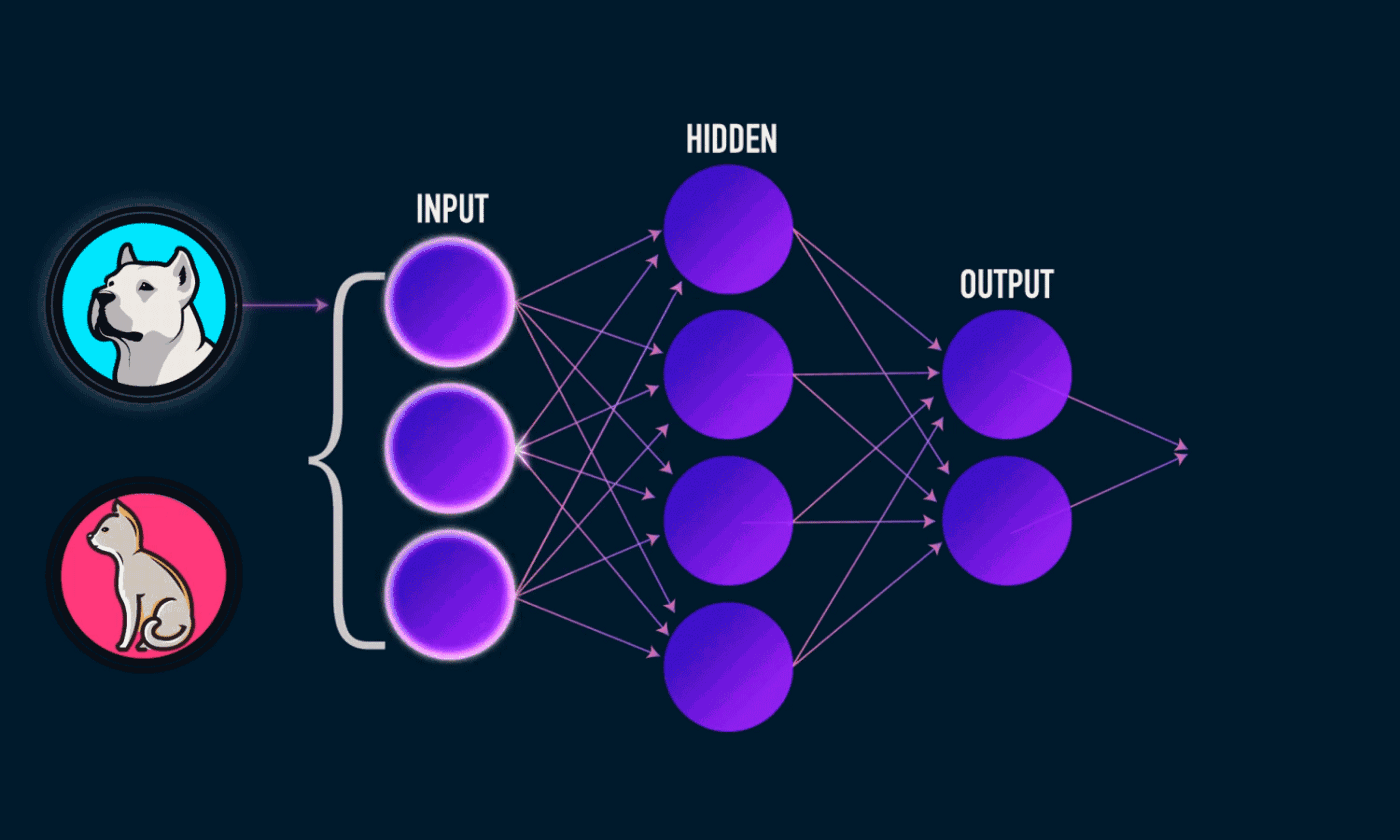

The folowoing exercise is a simple neural network for binary classification built from scratch using NumPy. The network has one hidden layer and uses sigmoid as the activation function for both the hidden and output layers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Input data (X) - 4 samples with 2 features (hours studied and assignments completed)
X = np.array([[1, 1],
              [2, 2],
              [3, 1],
              [4, 3]])

# Output data (y) - Pass (1) or Fail (0)
y = np.array([[0], [0], [1], [1]])

In [ ]:
# Sigmoid function (used as the activation function)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# Initialize weights randomly
input_layer_neurons = X.shape[1]  # 2 input features
hidden_layer_neurons = 3  # Number of neurons in the hidden layer
output_neurons = 1  # Single output (binary classification)

# Weights for layers (random initialization)
np.random.seed(42)
W_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
W_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))

# Biases (random initialization)
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

In [ ]:
# Hyperparameters
learning_rate = 0.1
epochs = 10000
ls =[]

In [ ]:
# Training the network
for epoch in range(epochs):
    # Forward pass

    # Hidden layer input: X * W_input_hidden + bias_hidden
    hidden_layer_input = np.dot(X, W_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    # Output layer input: hidden_layer_output * W_hidden_output + bias_output
    output_layer_input = np.dot(hidden_layer_output, W_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Calculate error
    error = y - predicted_output

    # Backpropagation
    # Calculate derivative of output layer error
    output_error_term = error * sigmoid_derivative(predicted_output)

    # Calculate hidden layer error
    hidden_error_term = output_error_term.dot(W_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases using the gradients
    W_hidden_output += hidden_layer_output.T.dot(output_error_term) * learning_rate
    W_input_hidden += X.T.dot(hidden_error_term) * learning_rate
    bias_output += np.sum(output_error_term, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(hidden_error_term, axis=0, keepdims=True) * learning_rate

    ls.append(np.mean(np.abs(error)))
    # Print the error every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Error: {np.mean(np.abs(error))}")

Epoch 0 - Error: 0.026339647012636892
Epoch 1000 - Error: 0.0249311080690467
Epoch 2000 - Error: 0.023720713907330868
Epoch 3000 - Error: 0.022666445800884907
Epoch 4000 - Error: 0.02173771961307442
Epoch 5000 - Error: 0.02091168654685398
Epoch 6000 - Error: 0.020170895294763243
Epoch 7000 - Error: 0.01950176154066459
Epoch 8000 - Error: 0.01889353529648803
Epoch 9000 - Error: 0.01833758568446684


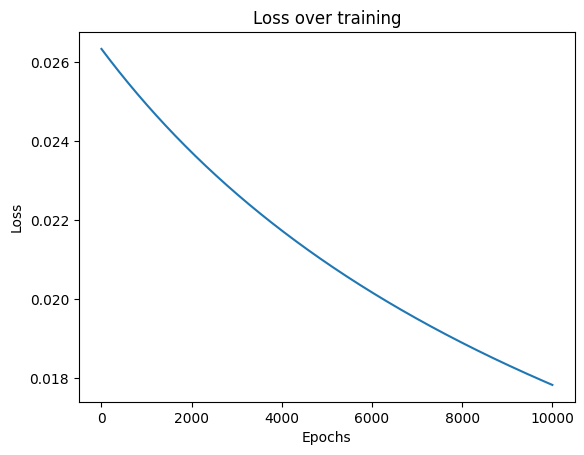

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over training')
plt.plot(ls);

In [ ]:
# After training, test the model
print("\nTraining completed!")
print(f"Final predicted output: {predicted_output[0]}")


Training completed!
Final predicted output: [0.01492872]


In [ ]:
# Function to classify the output
def classify(probability):
    return 1 if probability >= 0.5 else 0

In [ ]:
# Test prediction for new data (3 hours studied, 2 assignments)
new_data = np.array([[3, 2]])
hidden_layer_input = np.dot(new_data, W_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, W_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

predicted_class = classify(predicted_output[0][0])
print(f"Predicted class for 3 hours studied and 2 assignments: {predicted_class}")

Predicted class for 3 hours studied and 2 assignments: 1
